<a href="https://colab.research.google.com/github/Raghava2004-cpu/Logistic-Regression-Projects/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/mail_data.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data['Category'].replace({'ham' : 'Good'} , inplace = True)

<ipython-input-3-91204b212256>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Category'].replace({'ham' : 'Good'} , inplace = True)


In [4]:
data['Category'].head()

,Category
0,Good
1,Good
2,spam
3,Good
4,Good


In [5]:
data.shape

(5572, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,Good,"Sorry, I'll call later"
freq,4825,30


<Axes: xlabel='Category', ylabel='count'>

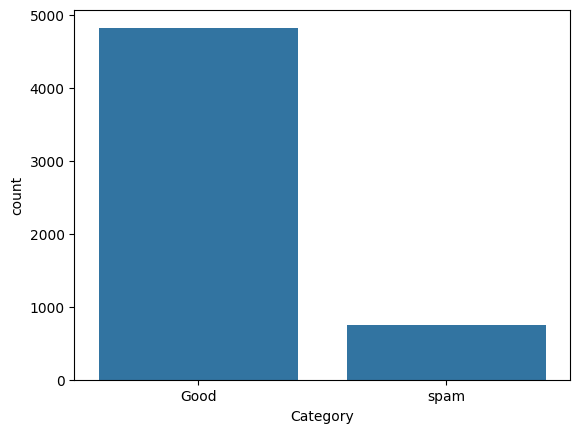

In [8]:
sns.countplot(x = 'Category' , data = data)

In [9]:
import re
def clean_text(text):
  text = re.sub(r'\s+' , ' ' , text)
  text = re.sub(r'^\w\s' , '' , text)
  text = text.lower().strip()
  return text

In [10]:
data['Message'] = data['Message'].apply(clean_text)

In [11]:
data['Category'] = data['Category'].apply(lambda x: 1 if 'Good' in x else 0 )

In [12]:
data.head()

,Category,Message
0,1,"go until jurong point, crazy.. available only ..."
1,1,ok lar... joking wif u oni...
2,0,free entry in 2 a wkly comp to win fa cup fina...
3,1,dun say so early hor... u c already then say...
4,1,"nah i don't think he goes to usf, he lives aro..."


In [13]:
from sklearn.model_selection import train_test_split

x = data['Message']
y = data['Category']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 42)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer()
x_train_tfidf = vector.fit_transform(x_train)
x_test_tfidf = vector.transform(x_test)

In [15]:
print(x_train_tfidf)

  (0, 5196)	0.32361427319387454
  (0, 3755)	0.29919909950726653
  (0, 3749)	0.3154241734309659
  (0, 970)	0.3333011051997056
  (0, 260)	0.3757262031675024
  (0, 932)	0.3282372295042308
  (0, 7161)	0.397268759382666
  (0, 2281)	0.4340960024770617
  (1, 4621)	0.30636153777642255
  (1, 6618)	0.6549543918323788
  (1, 4472)	0.43378282281747205
  (1, 5260)	0.537596331292588
  (2, 2949)	0.1849081311409041
  (2, 1610)	0.39062493761283285
  (2, 792)	0.2267693026234296
  (2, 3180)	0.4451969326021484
  (2, 890)	0.13371994391864034
  (2, 5493)	0.28574342741889813
  (2, 4709)	0.24780486569818902
  (2, 7014)	0.28807980933787997
  (2, 5707)	0.21983704744607066
  (2, 1937)	0.39062493761283285
  (2, 6373)	0.12245285157146851
  (2, 6103)	0.3221150226904984
  (3, 5566)	0.3617858586870062
  :	:
  (3895, 7104)	0.3243958538929349
  (3895, 7088)	0.38694613192852917
  (3895, 3856)	0.38694613192852917
  (3896, 3881)	0.48513176447732426
  (3896, 1486)	0.3957147536823354
  (3896, 3758)	0.5542360699545098
  (3896

In [16]:
from sklearn.linear_model import LogisticRegression

model1  = LogisticRegression(solver = 'sag' , max_iter = 8000)
model1.fit(x_train_tfidf , y_train)

LogisticRegression(max_iter=8000, solver='sag')

In [17]:
predicted = model1.predict(x_test_tfidf)


In [18]:
from sklearn.metrics import *

print(f"Accuracy Score : {accuracy_score(y_test , predicted)}")
print(f"Recall Score : {recall_score(y_test , predicted)}")
print(f"Precision Score : {precision_score(y_test , predicted)}")
print(f"ROC AUC Score : {roc_auc_score(y_test , predicted)}")

Accuracy Score : 0.9700956937799043
Recall Score : 0.9986187845303868
Precision Score : 0.9678714859437751
ROC AUC Score : 0.8921665351223362


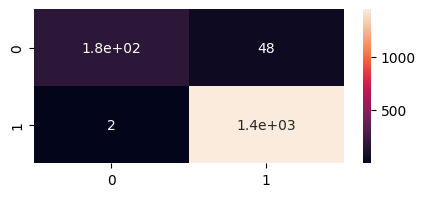

In [19]:
cn = confusion_matrix(y_test , predicted)
plt.figure(figsize = (5,2))
sns.heatmap(cn , annot = True)
plt.show()

In [20]:
from sklearn.model_selection import cross_val_score , KFold

kf = KFold(n_splits = 10 , shuffle = True , random_state = 42)
new_model = LogisticRegression(solver = 'saga' , max_iter = 10000)
best_accuracy = 0
best_fold_data = None

for fold , (train_index , test_index) in enumerate(kf.split(x)):
  x_train , x_test = x.iloc[train_index] , x.iloc[test_index]
  y_train , y_test = y.iloc[train_index] , y.iloc[test_index]


  vector = TfidfVectorizer()
  x_train_vec = vector.fit_transform(x_train)
  x_test_vec = vector.transform(x_test)

  new_model.fit(x_train_vec , y_train)
  predict = new_model.predict(x_test_vec)

  accuracy = accuracy_score(y_test , predict)
  if accuracy > best_accuracy :
    best_accuracy = accuracy
    best_fold_data =   (x_train , x_test , y_train , y_test)
    print(x_train.shape)
  print(f"Accuracy Score {fold+1} : {accuracy_score(y_test , predict)}")

print(f"Best Accuracy : {best_accuracy}")
if best_fold_data:
  x_train , x_test , y_train , y_test = best_fold_data

(5014,)
Accuracy Score 1 : 0.9713261648745519
(5014,)
Accuracy Score 2 : 0.9767025089605734
Accuracy Score 3 : 0.9748653500897666
(5015,)
Accuracy Score 4 : 0.9802513464991023
Accuracy Score 5 : 0.9766606822262118
Accuracy Score 6 : 0.9730700179533214
Accuracy Score 7 : 0.9569120287253142
Accuracy Score 8 : 0.9748653500897666
Accuracy Score 9 : 0.9712746858168761
Accuracy Score 10 : 0.9587073608617595
Best Accuracy : 0.9802513464991023


In [21]:
print(x_train.shape)
print(y_train.shape)

(5015,)
(5015,)


In [22]:
cv_model =  LogisticRegression(solver = 'saga' , max_iter = 10000 , random_state = 42 )

vector = TfidfVectorizer()
x_train_vec1 = vector.fit_transform(x_train)
x_test_vec1 = vector.transform(x_test)

cv_model.fit(x_train_vec1 , y_train)
result = cv_model.predict(x_test_vec1)

In [23]:
print(f"Accuracy Score : {accuracy_score(y_test , result)}")
print(f"Recall Score : {recall_score(y_test , result)}")
print(f"Precision Score : {precision_score(y_test , result)}")
print(f"ROC AUC Score : {roc_auc_score(y_test , result)}")

Accuracy Score : 0.9802513464991023
Recall Score : 1.0
Precision Score : 0.978
ROC AUC Score : 0.9191176470588236


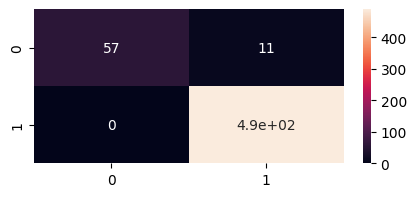

In [24]:
cn = confusion_matrix(y_test , result)
plt.figure(figsize = (5,2))
sns.heatmap(cn , annot = True)
plt.show()

<Axes: xlabel='Category', ylabel='count'>

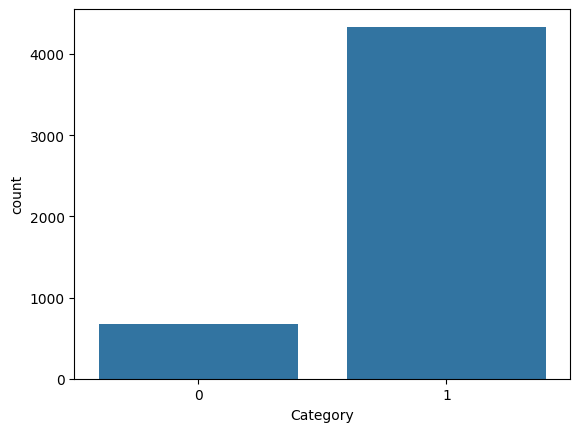

In [25]:
import seaborn as sns
sns.countplot(x = y_train , data = data)

<Axes: xlabel='Category', ylabel='count'>

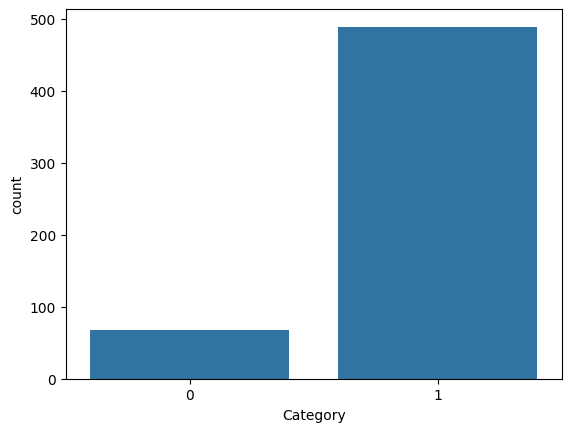

In [26]:
sns.countplot(x = y_test , data = data)